RAG (Retrieval-Augmented Generation) System

In [433]:
%pip install --quiet --upgrade langchain-text-splitters langchain-community langgraph

python(14157) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [479]:
import getpass
import os
from dotenv import load_dotenv

load_dotenv()
os.environ["LANGSMITH_TRACING"] = "true"

In [435]:
%pip install -U langchain-google-genai

python(14158) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [436]:
from langchain.chat_models import init_chat_model

model = init_chat_model("gemini-2.0-flash", model_provider="google_genai")

In [437]:
%pip install -qU langchain-huggingface

python(14159) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [438]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

In [439]:
%pip uninstall -y opentelemetry-sdk opentelemetry-exporter-otlp-proto-grpc opentelemetry-util opentelemetry-instrumentation chromadb langchain_chroma

%pip install -U "chromadb>=0.4.24" "opentelemetry-sdk==1.33.0" "opentelemetry-api==1.33.0" "opentelemetry-exporter-otlp-proto-grpc==1.33.0"

%pip install -U langchain langchain-chroma

python(14171) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Found existing installation: opentelemetry-sdk 1.33.0
Uninstalling opentelemetry-sdk-1.33.0:
  Successfully uninstalled opentelemetry-sdk-1.33.0
Found existing installation: opentelemetry-exporter-otlp-proto-grpc 1.33.0
Uninstalling opentelemetry-exporter-otlp-proto-grpc-1.33.0:
  Successfully uninstalled opentelemetry-exporter-otlp-proto-grpc-1.33.0
Found existing installation: opentelemetry-instrumentation 0.54b0
Uninstalling opentelemetry-instrumentation-0.54b0:
  Successfully uninstalled opentelemetry-instrumentation-0.54b0
Found existing installation: chromadb 1.0.9
Uninstalling chromadb-1.0.9:
  Successfully uninstalled chromadb-1.0.9
Found existing installation: langchain-chroma 0.2.4
Uninstalling langchain-chroma-0.2.4:
  Successfully uninstalled langchain-chroma-0.2.4
Note: you may need to restart the kernel to use updated packages.


python(14176) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached chromadb-1.0.9-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.9 kB)
  Using cached opentelemetry_sdk-1.33.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached opentelemetry_exporter_otlp_proto_grpc-1.33.0-py3-none-any.whl.metadata (2.5 kB)
  Using cached protobuf-5.29.4-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached opentelemetry_instrumentation-0.54b0-py3-none-any.whl.metadata (6.8 kB)
Using cached opentelemetry_sdk-1.33.0-py3-none-any.whl (118 kB)
Using cached opentelemetry_exporter_otlp_proto_grpc-1.33.0-py3-none-any.whl (18 kB)
Using cached protobuf-5.29.4-cp38-abi3-macosx_10_9_universal2.whl (417 kB)
Using cached chromadb-1.0.9-cp39-abi3-macosx_11_0_arm64.whl (17.5 MB)
Using cached opentelemetry_instrumentation-0.54b0-py3-none-any.whl (31 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.0
    Uninstalling protobuf-6.31.0:
      Successfully uninstalled protobuf-6.31.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

python(14177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached langchain_chroma-0.2.4-py3-none-any.whl.metadata (1.1 kB)
Using cached langchain_chroma-0.2.4-py3-none-any.whl (11 kB)
Note: you may need to restart the kernel to use updated packages.


In [440]:
from langchain_chroma import Chroma

# Create the vector store with persistence
vector_store = Chroma(
    collection_name="pope_francis_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_pope_db"  # Directory to save the data
)

print("Vector store created successfully!")

Vector store created successfully!


In [441]:
#question-answering
from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "(context goes here)", "question": "(question goes here)"}
).to_messages()
# Beispiel-Frage (vor dem Dokument)
frage = "Wann ist der Pope gestorben?"

# TEST 1
gefüllter_prompt = prompt.format(context="", question=frage)
antwort = model.invoke(gefüllter_prompt)
print("\n Antwort ohne Kontext:\n", antwort.content)


 Antwort ohne Kontext:
 Ich weiß die Antwort nicht.


In [442]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [443]:
%pip install beautifulsoup4 langchain langchain-community chromadb sentence-transformers

python(14182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


Dokument hochladen

In [444]:
from langchain.document_loaders import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings
import chromadb  # Importiere ChromaDB
from langchain.vectorstores import Chroma

In [445]:
loader = WebBaseLoader(web_paths=["https://de.wikipedia.org/wiki/Leo_XIV."])
docs = loader.load()

# 2. Aufteilen in ≥ 50 Chunks
splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # Chunks von max 1000 Zeichen
    chunk_overlap=200,  # 200 Zeichen Überlappung zwischen Chunks
    separators=["\n\n", "\n", ".", " ", ""]
)
# Chunks aufteilen
all_splits = splitter.split_documents(docs)

# 3. HuggingFace Embeddings initialisieren
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

# 4. Vektorspeicher mit ChromaDB initialisieren
client = chromadb.Client()

# ChromaDB-Datenbank initialisieren, dies könnte auch der Name deiner spezifischen Sammlung sein
vector_store = Chroma.from_documents(documents=all_splits, embedding=embeddings, client=client, collection_name="bundestagswahl_2025")

# 5. Dokumente in den Vektorspeicher hinzufügen
vector_store.add_documents(all_splits)

# Ausgabe der Anzahl der Chunks
print(f"Anzahl der Chunks: {len(all_splits)}")

Anzahl der Chunks: 52


Retrieval

In [446]:
from langgraph.graph import MessagesState, StateGraph

graph_builder = StateGraph(MessagesState)

In [447]:
from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "(context goes here)", "question": "(question goes here)"}
).to_messages()

assert len(example_messages) == 1
print(example_messages[0].content)

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: (question goes here) 
Context: (context goes here) 
Answer:


In [448]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict


class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

In [449]:
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = model.invoke(messages)
    return {"answer": response.content}

In [450]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

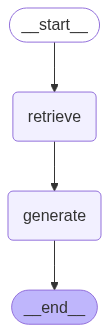

In [451]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

Testen

In [452]:
result = graph.invoke({"question": "Wann ist der Pope Franziskus gestorben?"})

print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Context: [Document(metadata={'title': 'Leo XIV. – Wikipedia', 'source': 'https://de.wikipedia.org/wiki/Leo_XIV.', 'language': 'de'}, page_content='↑ Kardinal Robert Francis Prevost die Insignien des Ehren- und Devotions-Großkreuz-Bailli verliehen. Abgerufen am 12.\xa0Februar 2025.\xa0\n\n↑ Das Wappen von Papst Prevost. In: Il Messaggero. 8.\xa0Mai 2025, abgerufen am 18.\xa0Mai 2025 (deutsch).\xa0\n\n↑ S. Aurelii Augustini: Enarrationes in Psalmos. In: Patrologia Latina, Bd. 37, Sp. 1679 (In Psalmum 127 online).\n\n↑ Habemus papam. Kardinal Robert Francis Prevost ist der neue Papst Leo XIV. Bistum Regensburg, 8.\xa0Mai 2025, abgerufen am 9.\xa0Mai 2025.\xa0\n\n↑ Nomina di Membro in diversi Dicasteri. In: Tägliches Bulletin. Presseamt des Heiligen Stuhls, 4.\xa0März 2023, abgerufen am 4.\xa0März 2023.\xa0\n\n↑ Nomina di Membri dei Dicasteri della Curia Romana e della Pontificia Commissione per lo Stato della Città del Vaticano. In: Tägliches Bulletin. Presseamt des Heiligen Stuhls, 4.\xa

In [453]:
for step in graph.stream(
    {"question": "Wann ist der Pope gestorben?"}, stream_mode="updates"
):
    print(f"{step}\n\n----------------\n")

{'retrieve': {'context': [Document(metadata={'title': 'Leo XIV. – Wikipedia', 'language': 'de', 'source': 'https://de.wikipedia.org/wiki/Leo_XIV.'}, page_content='↑ Biography of Robert Francis Prevost, Pope Leo XIV. Vatican News, 8.\xa0Mai 2025, abgerufen am 9.\xa0Mai 2025 (englisch).\xa0\n\n↑ Ronny Reyes: Who is Robert Prevost? Meet Leo XIV, the first American pope. 8.\xa0Mai 2025, abgerufen am 8.\xa0Mai 2025.\xa0\n\n↑ Rachel Van Gilder, Josh Sanchez: New pope attended Catholic high school in West Michigan. 8.\xa0Mai 2025, abgerufen am 9.\xa0Mai 2025 (englisch).\xa0\n\n↑ José Antonio Jacinto Fiestas: Biografía de Monseñor Robert Francis Prevost Martínez O.S.A. In: Somos Iglesia (Chiclayo), Jg. 2015, Juni-Heft, S. 11.\n\n↑ The Angelicum joyfully welcomes the election of our distinguished alumnus, Pope Leo XIV. Pontifical University of St. Thomas Aquinas, 8.\xa0Mai 2025, abgerufen am 9.\xa0Mai 2025 (englisch).\xa0\n\n↑ Mario Galgano: Bischof Robert Francis Prevost wird neuer Präfekt des

In [454]:
from langchain_core.prompts import PromptTemplate

template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Use three sentences maximum and keep the answer as concise as possible.
Always say "thanks for asking!" at the end of the answer.

{context}

Question: {question}

Helpful Answer:"""
custom_rag_prompt = PromptTemplate.from_template(template)

In [455]:
for step in graph.stream(
    {"question": "Aus welchem Land kommt den neuen Pope?"}, stream_mode="updates"
):
    print(f"{step}\n\n----------------\n")


{'retrieve': {'context': [Document(metadata={'title': 'Leo XIV. – Wikipedia', 'source': 'https://de.wikipedia.org/wiki/Leo_XIV.', 'language': 'de'}, page_content='↑ Biography of Robert Francis Prevost, Pope Leo XIV. Vatican News, 8.\xa0Mai 2025, abgerufen am 9.\xa0Mai 2025 (englisch).\xa0\n\n↑ Ronny Reyes: Who is Robert Prevost? Meet Leo XIV, the first American pope. 8.\xa0Mai 2025, abgerufen am 8.\xa0Mai 2025.\xa0\n\n↑ Rachel Van Gilder, Josh Sanchez: New pope attended Catholic high school in West Michigan. 8.\xa0Mai 2025, abgerufen am 9.\xa0Mai 2025 (englisch).\xa0\n\n↑ José Antonio Jacinto Fiestas: Biografía de Monseñor Robert Francis Prevost Martínez O.S.A. In: Somos Iglesia (Chiclayo), Jg. 2015, Juni-Heft, S. 11.\n\n↑ The Angelicum joyfully welcomes the election of our distinguished alumnus, Pope Leo XIV. Pontifical University of St. Thomas Aquinas, 8.\xa0Mai 2025, abgerufen am 9.\xa0Mai 2025 (englisch).\xa0\n\n↑ Mario Galgano: Bischof Robert Francis Prevost wird neuer Präfekt des

In [456]:
from langchain_core.prompts import PromptTemplate

template = """Here is some information that might help answer the question below.
If you're not sure about the answer, it's okay to say you don't know.
Please keep the answer short and friendly – no more than three sentences.
End your answer with: "Hope that helps!"

{context}

Question: {question}

Helpful Answer:"""

custom_rag_prompt = PromptTemplate.from_template(template)

In [457]:
for step in graph.stream(
    {"question": "Welche Krankenheiten hatte der Papst Franziskus?"}, stream_mode="updates"
):
    print(f"{step}\n\n----------------\n")


{'retrieve': {'context': [Document(metadata={'source': 'https://de.wikipedia.org/wiki/Leo_XIV.', 'title': 'Leo XIV. – Wikipedia', 'language': 'de'}, page_content='. Damit wolle er eine Linie fortsetzen, die Papst Franziskus mit seiner Option für die Armen begonnen hatte.[60] Ähnlich habe sich Leo XIV. bereits beim gemeinsamen Essen nach Abschluss des Konklaves geäußert, wie der chilenische Kardinal Fernando Chomalí berichtete.[61]'), Document(metadata={'language': 'de', 'title': 'Leo XIV. – Wikipedia', 'source': 'https://de.wikipedia.org/wiki/Leo_XIV.'}, page_content='. Damit wolle er eine Linie fortsetzen, die Papst Franziskus mit seiner Option für die Armen begonnen hatte.[60] Ähnlich habe sich Leo XIV. bereits beim gemeinsamen Essen nach Abschluss des Konklaves geäußert, wie der chilenische Kardinal Fernando Chomalí berichtete.[61]'), Document(metadata={'language': 'de', 'source': 'https://de.wikipedia.org/wiki/Leo_XIV.', 'title': 'Leo XIV. – Wikipedia'}, page_content='. Damit wolle

In [458]:
template = """Based on the provided information, answer the following question as clearly and accurately as possible.
Do not guess; if the information is insufficient, respond with "Information not available."
Limit your answer to three concise sentences.
Conclude with: "Thank you for your question."

{context}

Question: {question}

Helpful Answer:"""

custom_rag_prompt = PromptTemplate.from_template(template)

In [459]:
for step in graph.stream(
    {"question": "Wie hesst der neuen Pope?"}, stream_mode="updates"
):
    print(f"{step}\n\n----------------\n")

{'retrieve': {'context': [Document(metadata={'title': 'Leo XIV. – Wikipedia', 'source': 'https://de.wikipedia.org/wiki/Leo_XIV.', 'language': 'de'}, page_content='↑ Kardinal Robert Francis Prevost die Insignien des Ehren- und Devotions-Großkreuz-Bailli verliehen. Abgerufen am 12.\xa0Februar 2025.\xa0\n\n↑ Das Wappen von Papst Prevost. In: Il Messaggero. 8.\xa0Mai 2025, abgerufen am 18.\xa0Mai 2025 (deutsch).\xa0\n\n↑ S. Aurelii Augustini: Enarrationes in Psalmos. In: Patrologia Latina, Bd. 37, Sp. 1679 (In Psalmum 127 online).\n\n↑ Habemus papam. Kardinal Robert Francis Prevost ist der neue Papst Leo XIV. Bistum Regensburg, 8.\xa0Mai 2025, abgerufen am 9.\xa0Mai 2025.\xa0\n\n↑ Nomina di Membro in diversi Dicasteri. In: Tägliches Bulletin. Presseamt des Heiligen Stuhls, 4.\xa0März 2023, abgerufen am 4.\xa0März 2023.\xa0\n\n↑ Nomina di Membri dei Dicasteri della Curia Romana e della Pontificia Commissione per lo Stato della Città del Vaticano. In: Tägliches Bulletin. Presseamt des Heilig

In [460]:
template = """Use the information below to answer the question.
If you don't know the answer, just say: "I’m not sure from this information."
Keep the answer short – up to three sentences – and easy to understand.
Always say: "Thanks for your question!" at the end.

{context}

Question: {question}

Helpful Answer:"""
custom_rag_prompt = PromptTemplate.from_template(template)

In [461]:
for step in graph.stream(
    {"question": "Wie alt ist der Papst Leo XIV?"}, stream_mode="updates"
):
    print(f"{step}\n\n----------------\n")

{'retrieve': {'context': [Document(metadata={'title': 'Leo XIV. – Wikipedia', 'source': 'https://de.wikipedia.org/wiki/Leo_XIV.', 'language': 'de'}, page_content='Leo XIV. – Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nZum Inhalt springen\n\n\n\n\n\n\n\nHauptmenü\n\n\n\n\n\nHauptmenü\nIn die Seitenleiste verschieben\nVerbergen\n\n\n\n\t\tNavigation\n\t\n\n\nHauptseiteThemenportaleZufälliger ArtikelSpezialseiten\n\n\n\n\n\n\t\tMitmachen\n\t\n\n\nArtikel verbessernNeuen Artikel anlegenAutorenportalHilfeLetzte ÄnderungenKontakt\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSuche\n\n\n\n\n\n\n\n\n\n\n\nSuchen\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nErscheinungsbild\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJetzt spenden\n\nBenutzerkonto erstellen\n\nAnmelden\n\n\n\n\n\n\n\n\nMeine Werkzeuge\n\n\n\n\n\nJetzt spenden Benutzerkonto erstellen Anmelden\n\n\n\n\n\n\t\tSeiten für nicht angemeldete Benutzer weitere Informationen\n\n\n\nBeiträgeDiskussionsseite\n\n\n\n\n\

Query Analysis

In [462]:
from math import ceil

total = len(all_splits)
chunk_size = ceil(total / 10)

for i, doc in enumerate(all_splits):
    section = (i // chunk_size) + 1
    doc.metadata["section"] = str(section)

In [463]:
from collections import Counter

sections = [doc.metadata.get("section") for doc in all_splits]
count_per_section = Counter(sections)

print(" Dokumentanzahl pro Sektion:")
for section, count in sorted(count_per_section.items()):
    print(f"  Section {section}: {count} Dokumente")

 Dokumentanzahl pro Sektion:
  Section 1: 6 Dokumente
  Section 2: 6 Dokumente
  Section 3: 6 Dokumente
  Section 4: 6 Dokumente
  Section 5: 6 Dokumente
  Section 6: 6 Dokumente
  Section 7: 6 Dokumente
  Section 8: 6 Dokumente
  Section 9: 4 Dokumente


In [464]:
from langchain_core.vectorstores import InMemoryVectorStore

vector_store = InMemoryVectorStore(embeddings)
_ = vector_store.add_documents(all_splits)

In [465]:
from typing import Literal
from typing_extensions import Annotated
from typing import TypedDict

class Search(TypedDict):
    query: Annotated[str, ..., "Search query to run."]
    section: Annotated[
        Literal["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"],
        ...,
        "Section to query (1–10)."
    ]

In [466]:
from langgraph.graph import MessagesState, StateGraph

graph_builder = StateGraph(MessagesState)

In [467]:

# Define prompt for question-answering
prompt = hub.pull("rlm/rag-prompt")


# Define state for application
class State(TypedDict):
    question: str
    query: Search
    context: List[Document]
    answer: str


def analyze_query(state: State):
    structured_llm = model.with_structured_output(Search)
    query = structured_llm.invoke(state["question"])
    return {"query": query}


def retrieve(state: State):
    query = state["query"]
    retrieved_docs = vector_store.similarity_search(
        query["query"],
        filter=lambda doc: doc.metadata.get("section") == query["section"],
    )
    return {"context": retrieved_docs}


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = model.invoke(messages)
    return {"answer": response.content}


graph_builder = StateGraph(State).add_sequence([analyze_query, retrieve, generate])
graph_builder.add_edge(START, "analyze_query")
graph = graph_builder.compile()

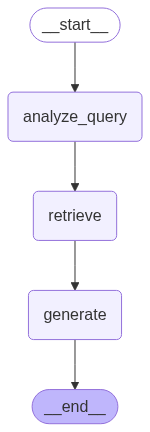

In [468]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [469]:
for step in graph.stream(
    {"question": "Wie heißt der Papst, Der vorherige Papst war?"},  # Example question
    stream_mode="updates",
):
    print(f"{step}\n\n----------------\n")

{'analyze_query': {'query': {'section': '2', 'query': 'Vorheriger Papst'}}}

----------------

{'retrieve': {'context': [Document(id='c20dede9-20ed-40a3-9cfe-e2d9c12e09ad', metadata={'source': 'https://de.wikipedia.org/wiki/Leo_XIV.', 'title': 'Leo XIV. – Wikipedia', 'language': 'de', 'section': '2'}, page_content='1998 wurde Prevost zum Provinzialprior der Ordensprovinz in Chicago gewählt, das Amt trat er im März 1999 an. Im Jahr 2000 erlaubte er einem seit 1991 wegen Missbrauchsvorwürfen suspendierten Augustinerpater, unter Aufsicht in einem Kloster in Chicago zu wohnen. Dieser wurde 2002 nach Einführung strengerer Regeln zum Umgang mit des Missbrauchs Beschuldigten (Dallas Charter) umgesiedelt.[18]'), Document(id='143888c5-9098-4c3d-9bab-e62f41b0c117', metadata={'source': 'https://de.wikipedia.org/wiki/Leo_XIV.', 'title': 'Leo XIV. – Wikipedia', 'language': 'de', 'section': '2'}, page_content='Leben und Werdegang[Bearbeiten | Quelltext bearbeiten]\nAusbildung und Positionen im Augus

Dialog Flow

In [470]:
from langgraph.graph import MessagesState, StateGraph

graph_builder = StateGraph(MessagesState)

In [471]:
from langchain_core.tools import tool


@tool(response_format="content_and_artifact")
def retrieve(query: str):
    """Retrieve information related to a query."""
    retrieved_docs = vector_store.similarity_search(query, k=2)
    serialized = "\n\n".join(
        (f"Source: {doc.metadata}\n" f"Content: {doc.page_content}")
        for doc in retrieved_docs
    )
    return serialized, retrieved_docs

In [472]:
from langchain_core.messages import SystemMessage
from langgraph.prebuilt import ToolNode


# Step 1: Generate an AIMessage that may include a tool-call to be sent.
def query_or_respond(state: MessagesState):
    """Generate tool call for retrieval or respond."""
    llm_with_tools = model.bind_tools([retrieve])
    response = llm_with_tools.invoke(state["messages"])
    # MessagesState appends messages to state instead of overwriting
    return {"messages": [response]}


# Step 2: Execute the retrieval.
tools = ToolNode([retrieve])


# Step 3: Generate a response using the retrieved content.
def generate(state: MessagesState):
    """Generate answer."""
    # Get generated ToolMessages
    recent_tool_messages = []
    for message in reversed(state["messages"]):
        if message.type == "tool":
            recent_tool_messages.append(message)
        else:
            break
    tool_messages = recent_tool_messages[::-1]

    # Format into prompt
    docs_content = "\n\n".join(doc.content for doc in tool_messages)
    system_message_content = (
        "You are an assistant for question-answering tasks. "
        "Use the following pieces of retrieved context to answer "
        "the question. If you don't know the answer, say that you "
        "don't know. Use three sentences maximum and keep the "
        "answer concise."
        "\n\n"
        f"{docs_content}"
    )
    conversation_messages = [
        message
        for message in state["messages"]
        if message.type in ("human", "system")
        or (message.type == "ai" and not message.tool_calls)
    ]
    prompt = [SystemMessage(system_message_content)] + conversation_messages

    # Run
    response = model.invoke(prompt)
    return {"messages": [response]}

In [473]:
from langgraph.graph import END
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder.add_node(query_or_respond)
graph_builder.add_node(tools)
graph_builder.add_node(generate)

graph_builder.set_entry_point("query_or_respond")
graph_builder.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tools"},
)
graph_builder.add_edge("tools", "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()

Ohne Memory

In [474]:
input_message = "Hola!"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Hola!
================================== Ai Message ==================================

Hola! How can I help you today?


In [475]:
input_message = "desde cuando es Leon XIV papa?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

desde cuando es Leon XIV papa?
================================== Ai Message ==================================
Tool Calls:
  retrieve (4dd6b84c-7408-4e8b-bc6c-4b4f3a718d36)
 Call ID: 4dd6b84c-7408-4e8b-bc6c-4b4f3a718d36
  Args:
    query: when was Pope Leo XIV?
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://de.wikipedia.org/wiki/Leo_XIV.', 'title': 'Leo XIV. – Wikipedia', 'language': 'de', 'section': '1'}
Content: Leo XIV. – Wikipedia




































Zum Inhalt springen







Hauptmenü





Hauptmenü
In die Seitenleiste verschieben
Verbergen



		Navigation
	


HauptseiteThemenportaleZufälliger ArtikelSpezialseiten





		Mitmachen
	


Artikel verbessernNeuen Artikel anlegenAutorenportalHilfeLetzte ÄnderungenKontakt



















Suche











Suchen






















Erscheinungsbild












In [476]:
input_message = "Aus welchem Land kommt Robert Francis Prevost?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Aus welchem Land kommt Robert Francis Prevost?
================================== Ai Message ==================================
Tool Calls:
  retrieve (7e483cc4-42fc-4be5-b845-d2006acc9575)
 Call ID: 7e483cc4-42fc-4be5-b845-d2006acc9575
  Args:
    query: Robert Francis Prevost country of origin
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://de.wikipedia.org/wiki/Leo_XIV.', 'title': 'Leo XIV. – Wikipedia', 'language': 'de', 'section': '7'}
Content: ↑ Matthias Rüb: Neuer Papst Leo XIV.: Wer ist Robert Prevost? In: faz.net. FAZ, 8. Mai 2025, abgerufen am 8. Mai 2025. 

↑ a b c Porträt – Wer ist Papst Leo XIV.? In: tagesschau.de. 8. Mai 2025, abgerufen am 9. Mai 2025. 

↑ Rinuncia del Prefetto del Dicastero per i Vescovi e Presidente della Pontificia Commissione per l’America Latina e Nomina del successore. In: Tägliches Bulletin. 

Mit Memory

In [477]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

# Specify an ID for the thread
config = {"configurable": {"thread_id": "abc123"}}

In [478]:
input_message = "Welchen Ordensgemeinschaft gehört der Papst an?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Welchen Ordensgemeinschaft gehört der Papst an?


================================== Ai Message ==================================

Bitte gib mir den Namen des Papstes, damit ich dir sagen kann, welchem Orden er angehört.
